In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
source = r'/content/gdrive/MyDrive/skripsi/hasil-data-fix.csv'
data = pd.read_csv(source)


In [ ]:
import numpy as np

In [ ]:
data

,NIK,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama
0,200700326,0.970874,0.957895,0.676471,0.00,0.944444,0.965517,0.896552,0.767857
1,199500085,0.902913,0.863158,0.470588,0.00,0.866667,0.758621,0.827586,0.982143
2,199500048,0.883495,0.915789,0.558824,0.00,0.955556,0.982759,1.000000,1.000000
3,200700297,0.951456,0.968421,0.794118,0.00,0.911111,0.810345,1.000000,0.892857
4,201600670,0.873786,0.957895,0.470588,0.00,0.944444,0.965517,1.000000,0.982143
...,...,...,...,...,...,...,...,...,...
1331,201000393,0.961165,0.884211,0.441176,0.58,0.611111,0.517241,0.448276,0.392857
1332,200800348,0.902913,0.884211,0.882353,1.00,1.000000,1.000000,1.000000,1.000000
1333,200100421,0.883495,0.852632,0.735294,1.00,0.866667,0.793103,0.758621,0.767857
1334,199500919,0.902913,0.873684,0.676471,0.00,0.866667,0.775862,0.965517,0.660714


In [ ]:
data_numeric = data.iloc[:,1:9]

In [ ]:
K=4
# Select random observation as centroids
Centroids = (data_numeric.sample(n=K))

In [ ]:
import pickle
source = r'/content/gdrive/MyDrive/skripsi/centroids.pkl'
with open (source,'rb') as file:
            Centroids = pickle.load(file)


In [ ]:
Centroids

,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama
318,0.941748,0.936842,0.500000,1.00,0.911111,0.706897,0.758621,0.803571
618,0.970874,0.968421,0.941176,1.00,0.933333,1.000000,1.000000,1.000000
648,0.932039,0.915789,0.470588,0.35,1.000000,1.000000,1.000000,1.000000
281,0.970874,0.926316,0.411765,0.00,0.988889,0.862069,0.965517,0.875000


In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=data_numeric
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_d["PK"]-row_c["PK"])**2
            d2 = (row_d["PERFORMANCE"]-row_c["PERFORMANCE"])**2
            d3 = (row_d["COMPETENCY"]-row_c["COMPETENCY"])**2
            d4 = (row_d["LEARNING POINT"]-row_c["LEARNING POINT"])**2
            d5 = (row_d["Kerja Ibadah"]-row_c["Kerja Ibadah"])**2
            d6 = (row_d["Apresiasi"]-row_c["Apresiasi"])**2
            d7 = (row_d["Lebih cepat"]-row_c["Lebih cepat"])**2
            d8 = (row_d["Aktif bersama"]-row_c["Aktif bersama"])**2
            d = np.sqrt(d1+d2+d3+d4+d5+d6+d7+d8)
            ED.append(d)
        data_numeric[i]=ED
        i=i+1

    C=[]
    for index,row in data_numeric.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    data_numeric["Cluster"]=C
    data["Cluster"] =C
    Centroids_new = data_numeric.groupby(["Cluster"]).mean()
    [["PK","PERFORMANCE","COMPETENCY","LEARNING POINT",
      'Kerja Ibadah','Apresiasi','Lebih cepat','Aktif bersama']]
      
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['PK'] - Centroids['PK']).sum() 
        + (Centroids_new['PERFORMANCE'] - Centroids['PERFORMANCE']).sum() 
        + (Centroids_new['COMPETENCY'] - Centroids['COMPETENCY']).sum() 
        + (Centroids_new['LEARNING POINT'] - Centroids['LEARNING POINT']).sum() 
        + (Centroids_new['Kerja Ibadah'] - Centroids['Kerja Ibadah']).sum() 
        + (Centroids_new['Apresiasi'] - Centroids['Apresiasi']).sum() 
        + (Centroids_new['Lebih cepat'] - Centroids['Lebih cepat']).sum() 
        + (Centroids_new['Aktif bersama'] - Centroids['Aktif bersama']).sum()
        print(diff.sum())
        
    Centroids = data_numeric.groupby(["Cluster"]).mean()[["PK","PERFORMANCE","COMPETENCY",
                                                          "LEARNING POINT",'Kerja Ibadah','Apresiasi','Lebih cepat','Aktif bersama']]

0.02073453863189989
-0.01597065486790694
-0.07761863318573381
-0.1293108657485178
-0.12632604761980926
-0.11540791139516915
-0.15912885518823033
-0.10240709662256628
-0.046923741734786396
-0.000630042779306117
0.00014916260739916698
-0.00015670605154538553
-0.00043595511985239366
7.15290198757268e-05
0.0


In [ ]:
Centroids

,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama
Cluster,,,,,,,,
1,0.925487,0.880982,0.424396,0.886196,0.823654,0.682357,0.643220,0.664001
2,0.937757,0.917464,0.615363,0.922860,0.949095,0.951443,0.919214,0.947004
3,0.906967,0.872213,0.508539,0.077437,0.903405,0.877765,0.825701,0.872856
4,0.000000,0.021658,0.422583,0.003448,0.792720,0.654182,0.579073,0.720033


In [ ]:
Centroids['Cluster'] = Centroids.index
Centroids


,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
Cluster,,,,,,,,,
1,0.925487,0.880982,0.424396,0.886196,0.823654,0.682357,0.643220,0.664001,1
2,0.937757,0.917464,0.615363,0.922860,0.949095,0.951443,0.919214,0.947004,2
3,0.906967,0.872213,0.508539,0.077437,0.903405,0.877765,0.825701,0.872856,3
4,0.000000,0.021658,0.422583,0.003448,0.792720,0.654182,0.579073,0.720033,4


In [ ]:
selected = Centroids[['PK','PERFORMANCE','COMPETENCY','LEARNING POINT','Kerja Ibadah','Apresiasi','Lebih cepat','Aktif bersama','Cluster']]
centroid = pd.DataFrame(selected)
centroid

,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
Cluster,,,,,,,,,
1,0.925487,0.880982,0.424396,0.886196,0.823654,0.682357,0.643220,0.664001,1
2,0.937757,0.917464,0.615363,0.922860,0.949095,0.951443,0.919214,0.947004,2
3,0.906967,0.872213,0.508539,0.077437,0.903405,0.877765,0.825701,0.872856,3
4,0.000000,0.021658,0.422583,0.003448,0.792720,0.654182,0.579073,0.720033,4


In [ ]:
data_numeric

,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,1,2,3,4,Cluster
0,0.970874,0.957895,0.676471,0.00,0.944444,0.965517,0.896552,0.767857,1.013210,0.943908,0.266556,1.451426,3
1,0.902913,0.863158,0.470588,0.00,0.866667,0.758621,0.827586,0.982143,0.964975,0.964572,0.187157,1.293262,3
2,0.883495,0.915789,0.558824,0.00,0.955556,0.982759,1.000000,1.000000,1.074345,0.931757,0.266953,1.410195,3
3,0.951456,0.968421,0.794118,0.00,0.911111,0.810345,1.000000,0.892857,1.064920,0.957715,0.366295,1.478219,3
4,0.873786,0.957895,0.470588,0.00,0.944444,0.965517,1.000000,0.982143,1.057990,0.941455,0.259976,1.417106,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.961165,0.884211,0.441176,0.58,0.611111,0.517241,0.448276,0.392857,0.528470,0.990542,0.921114,1.475290,1
1332,0.902913,0.884211,0.882353,1.00,1.000000,1.000000,1.000000,1.000000,0.771608,0.306330,1.030455,1.783780,2
1333,0.883495,0.852632,0.735294,1.00,0.866667,0.793103,0.758621,0.767857,0.387808,0.342390,0.963076,1.619036,2
1334,0.902913,0.873684,0.676471,0.00,0.866667,0.775862,0.965517,0.660714,0.981799,0.990083,0.332419,1.333718,3


In [ ]:
data

,NIK,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
0,200700326,0.970874,0.957895,0.676471,0.00,0.944444,0.965517,0.896552,0.767857,3
1,199500085,0.902913,0.863158,0.470588,0.00,0.866667,0.758621,0.827586,0.982143,3
2,199500048,0.883495,0.915789,0.558824,0.00,0.955556,0.982759,1.000000,1.000000,3
3,200700297,0.951456,0.968421,0.794118,0.00,0.911111,0.810345,1.000000,0.892857,3
4,201600670,0.873786,0.957895,0.470588,0.00,0.944444,0.965517,1.000000,0.982143,3
...,...,...,...,...,...,...,...,...,...,...
1331,201000393,0.961165,0.884211,0.441176,0.58,0.611111,0.517241,0.448276,0.392857,1
1332,200800348,0.902913,0.884211,0.882353,1.00,1.000000,1.000000,1.000000,1.000000,2
1333,200100421,0.883495,0.852632,0.735294,1.00,0.866667,0.793103,0.758621,0.767857,2
1334,199500919,0.902913,0.873684,0.676471,0.00,0.866667,0.775862,0.965517,0.660714,3


In [ ]:
data_numeric.to_csv(r'/content/gdrive/MyDrive/skripsi/hasil-clustering-scratch.csv',
                    index = False)
data.to_csv(r'/content/gdrive/MyDrive/skripsi/hasil-clustering-scratch-lengkap.csv',
            index = False)
Centroids.to_csv(r'/content/gdrive/MyDrive/skripsi/centroid.csv',
                 index = False)

In [ ]:
import pickle
with open('centroids.pkl','wb') as f:
  pickle.dump(Centroids, f)
  print("Centroids are save to pickle file")

Centroids are save to pickle file


In [ ]:
import pickle
with open('/content/gdrive/MyDrive/skripsi/centroids.pkl','wb') as f:
  pickle.dump(Centroids, f)
  print("Centroids are save to pickle file")

Centroids are save to pickle file


In [ ]:
from sklearn.decomposition import PCA 
x =data_numeric.iloc[:,:-5]
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/skripsi/pca.pkl','wb') as f:
  pickle.dump(X_pca, f)
  print("PCA are save to pickle file")

PCA are save to pickle file


In [ ]:
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[0.23486532 0.10538405 0.05893076]
[0.53123283 0.23836414 0.13329322]
[0.53123283 0.76959698 0.90289019]


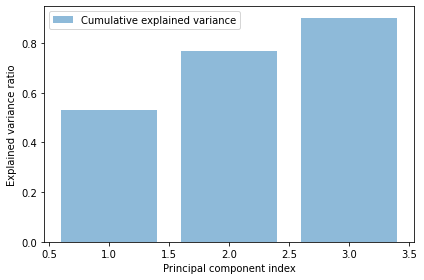

In [ ]:
import matplotlib.pyplot as plt

#plt.bar(range(0,len(pca.explained_variance_)), pca.explained_variance_, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(pca.explained_variance_ratio_.cumsum())), pca.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')
plt.bar(range(1,len(pca.explained_variance_ratio_.cumsum())+ 1), pca.explained_variance_ratio_.cumsum(), alpha=0.5, align='center',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
x

,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama
0,0.970874,0.957895,0.676471,0.00,0.944444,0.965517,0.896552,0.767857
1,0.902913,0.863158,0.470588,0.00,0.866667,0.758621,0.827586,0.982143
2,0.883495,0.915789,0.558824,0.00,0.955556,0.982759,1.000000,1.000000
3,0.951456,0.968421,0.794118,0.00,0.911111,0.810345,1.000000,0.892857
4,0.873786,0.957895,0.470588,0.00,0.944444,0.965517,1.000000,0.982143
...,...,...,...,...,...,...,...,...
1331,0.961165,0.884211,0.441176,0.58,0.611111,0.517241,0.448276,0.392857
1332,0.902913,0.884211,0.882353,1.00,1.000000,1.000000,1.000000,1.000000
1333,0.883495,0.852632,0.735294,1.00,0.866667,0.793103,0.758621,0.767857
1334,0.902913,0.873684,0.676471,0.00,0.866667,0.775862,0.965517,0.660714


In [ ]:
X_pca=pd.DataFrame(X_pca)
X_pca.columns=["pc1","pc2","pc3"]
X_pca["y"]=data_numeric['Cluster']

In [ ]:
X_pca

,pc1,pc2,pc3,y
0,0.334544,-0.393055,0.111814,3
1,0.430211,-0.251333,0.112055,3
2,0.343216,-0.450155,-0.055022,3
3,0.314143,-0.426565,0.046470,3
4,0.350329,-0.435388,-0.003453,3
...,...,...,...,...
1331,0.084803,0.480923,0.570554,1
1332,-0.567155,-0.030305,-0.280983,2
1333,-0.431627,0.284971,-0.002728,2
1334,0.410069,-0.240992,0.124271,3


Calculate centroid in pca

In [ ]:
X_pca.to_csv(r'/content/gdrive/MyDrive/skripsi/x_pca.csv',index = False)

In [ ]:
#x_centroid = Centroids.iloc[:,:-1]
#pca_centroid = PCA(n_components=3)
#X_pca_cent = pca_centroid.fit_transform(x_centroid)
#x_centroid
cluster1 = X_pca.loc[X_pca['y'] == 1]
cluster1

,pc1,pc2,pc3,y
980,1.094068,0.865978,-0.386204,1
981,1.098295,0.872306,-0.377280,1
982,0.887301,0.307433,-0.876618,1
983,0.913230,0.401401,-0.821608,1
984,1.093190,0.863814,-0.388310,1
...,...,...,...,...
1190,1.090327,0.816327,-0.405882,1
1192,1.143064,0.948942,-0.280498,1
1193,1.088348,0.831742,-0.413582,1
1194,1.043099,0.714790,-0.522237,1


In [ ]:
cluster2 = X_pca.loc[X_pca['y'] == 2]
cluster2

,pc1,pc2,pc3,y
14,-0.386756,0.416877,0.314485,2
15,-0.369032,0.444298,0.350105,2
16,-0.339235,0.485981,0.401390,2
18,-0.413662,0.348185,0.239948,2
19,-0.384959,0.400750,0.284490,2
...,...,...,...,...
1338,-0.194863,0.073475,0.155595,2
1349,-0.334895,0.477570,0.342687,2
1350,-0.141504,0.173505,0.118971,2
1364,0.088171,0.483389,0.571473,2


In [ ]:
cluster3 = X_pca.loc[X_pca['y'] == 3]
cluster3

,pc1,pc2,pc3,y
9,-0.586664,-0.064323,-0.192614,3
10,-0.560677,-0.038427,-0.152298,3
11,-0.476191,0.181742,0.057500,3
12,-0.573903,-0.055000,-0.157178,3
13,-0.522260,0.066760,-0.006238,3
...,...,...,...,...
1354,-0.600600,-0.085647,-0.211195,3
1357,-0.093781,-0.223415,-0.035716,3
1363,-0.603537,-0.087860,-0.216806,3
1365,-0.562918,-0.033257,-0.277496,3


In [ ]:
cluster4 = X_pca.loc[X_pca['y'] == 4]
cluster4

,pc1,pc2,pc3,y
0,0.344228,-0.387654,0.110637,4
1,0.438108,-0.245114,0.110149,4
2,0.352334,-0.444655,-0.056519,4
3,0.323746,-0.420990,0.045147,4
4,0.359461,-0.429945,-0.004984,4
...,...,...,...,...
1359,0.382125,-0.404306,-0.017557,4
1360,0.382540,-0.401133,-0.014038,4
1361,0.435446,-0.240173,0.101492,4
1362,0.255520,-0.155278,0.065901,4


In [ ]:
cluster1.describe()

,pc1,pc2,pc3,y
count,87.000000,87.000000,87.000000,87.0
mean,1.029513,0.698573,-0.524871,1.0
std,0.096196,0.210800,0.202078,0.0
min,0.658063,0.189796,-1.049346,1.0
25%,1.007555,0.583999,-0.596747,1.0
50%,1.055785,0.741767,-0.482624,1.0
75%,1.095250,0.861649,-0.387257,1.0
max,1.149692,0.977712,-0.137860,1.0


In [ ]:
cluster2.describe()

,pc1,pc2,pc3,y
count,166.000000,166.000000,166.000000,166.0
mean,-0.261442,0.372405,0.253219,2.0
std,0.215048,0.167217,0.174381,0.0
min,-0.468893,0.017479,-0.145868,2.0
25%,-0.408272,0.263895,0.145599,2.0
50%,-0.349473,0.348346,0.224104,2.0
75%,-0.177652,0.465601,0.332370,2.0
max,0.788744,1.122107,1.080446,2.0


In [ ]:
mean_pc1 = cluster1['pc1'].mean()
mean_pc1


0.41294615997205375

In [ ]:
data = {'pc1':[cluster1['pc1'].mean(),cluster2['pc1'].mean(),cluster3['pc1'].mean()
               ,cluster4['pc1'].mean()
               ],
        'pc2':[cluster1['pc2'].mean(),cluster2['pc2'].mean(),cluster3['pc2'].mean()
               ,cluster4['pc2'].mean()
               ],
        'pc3': [cluster1['pc3'].mean(),cluster2['pc3'].mean(),cluster3['pc3'].mean()
               ,cluster4['pc3'].mean()
               ],
        'y':[1,2,3,4]}


In [ ]:
data

{'pc1': [1.02951304510343,
  -0.2614422656174082,
  -0.45187196503210914,
  0.35610139324712375],
 'pc2': [0.6985734820113058,
  0.3724047159720928,
  0.02014933518288233,
  -0.23572673862743135],
 'pc3': [-0.5248705497085681,
  0.2532189585689345,
  -0.09002718777730648,
  0.09357022361894801],
 'y': [1, 2, 3, 4]}

In [ ]:
x_pca_centroid =pd.DataFrame(data)
x_pca_centroid

,pc1,pc2,pc3,y
0,1.029513,0.698573,-0.524871,1
1,-0.261442,0.372405,0.253219,2
2,-0.451872,0.020149,-0.090027,3
3,0.356101,-0.235727,0.093570,4


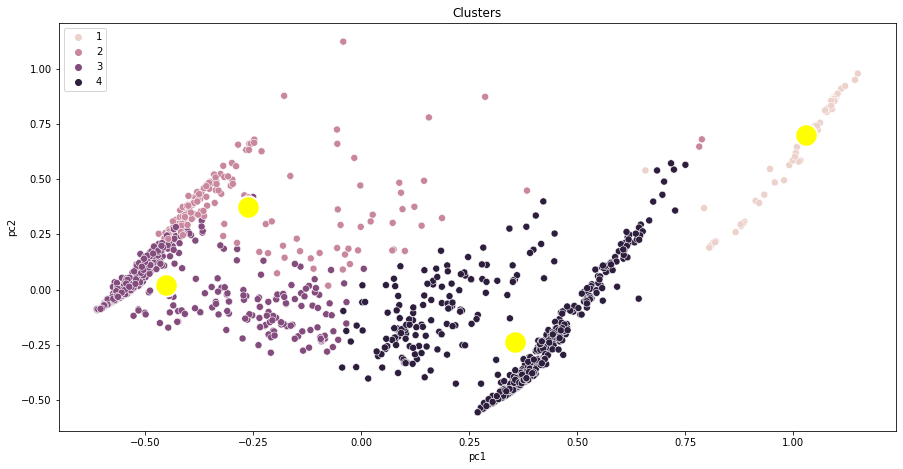

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7.5))
sns.scatterplot(x='pc1',y='pc2',data=X_pca,s=50,hue='y')
sns.scatterplot(x='pc1',y='pc2',data=x_pca_centroid,s=500,color='yellow')
plt.title('Clusters')
plt.legend()
plt.show()

In [ ]:

import plotly.express as px
fig = px.scatter(X_pca, x='pc1', y='pc2',color='y',title="Cluster")
fig2 = px.scatter(x_pca_centroid, x='pc1', y='pc2',color='y')
fig.update_traces(marker_coloraxis=None)
fig2.update_traces(marker={'size': 30})
fig.show()
fig2.show()


In [ ]:
fig = px.scatter_3d(X_pca, x='pc1', y='pc2', z='pc3',color='y',title="cluster")
fig.update_traces(marker_coloraxis=None)
fig.show()

In [ ]:
fig = px.scatter_3d(x_pca_centroid, x='pc1', y='pc2', z='pc3',color='y',title="cluster")
fig.update_traces(marker_coloraxis=None)
fig.show()

**SAVE TO EACH FILE CLUSTER**

In [ ]:
path = r'/content/gdrive/MyDrive/skripsi/hasil-clustering-scratch-lengkap.csv'
result= pd.read_csv(path)
result

,NIK,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
0,200700326,0.970874,0.957895,0.676471,0.00,0.944444,0.965517,0.896552,0.767857,3
1,199500085,0.902913,0.863158,0.470588,0.00,0.866667,0.758621,0.827586,0.982143,3
2,199500048,0.883495,0.915789,0.558824,0.00,0.955556,0.982759,1.000000,1.000000,3
3,200700297,0.951456,0.968421,0.794118,0.00,0.911111,0.810345,1.000000,0.892857,3
4,201600670,0.873786,0.957895,0.470588,0.00,0.944444,0.965517,1.000000,0.982143,3
...,...,...,...,...,...,...,...,...,...,...
1331,201000393,0.961165,0.884211,0.441176,0.58,0.611111,0.517241,0.448276,0.392857,1
1332,200800348,0.902913,0.884211,0.882353,1.00,1.000000,1.000000,1.000000,1.000000,2
1333,200100421,0.883495,0.852632,0.735294,1.00,0.866667,0.793103,0.758621,0.767857,2
1334,199500919,0.902913,0.873684,0.676471,0.00,0.866667,0.775862,0.965517,0.660714,3


In [ ]:
cluster_1 = result.loc[result['Cluster'] == 1]
cluster_1

,NIK,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
13,201600647,0.970874,0.936842,0.470588,1.00,0.866667,0.620690,0.655172,0.589286,1
14,201903571,0.970874,0.936842,0.382353,1.00,0.833333,0.620690,0.620690,0.607143,1
15,201903198,0.970874,0.926316,0.235294,1.00,0.833333,0.706897,0.517241,0.589286,1
17,201800932,0.970874,0.936842,0.500000,1.00,0.944444,0.620690,0.689655,0.696429,1
18,201500608,0.970874,0.915789,0.411765,1.00,0.877778,0.603448,0.689655,0.660714,1
...,...,...,...,...,...,...,...,...,...,...
1305,201800934,0.970874,0.936842,0.441176,0.70,0.933333,0.810345,0.775862,0.821429,1
1316,200100216,0.951456,0.894737,0.235294,1.00,0.855556,0.655172,0.551724,0.678571,1
1317,200000197,0.902913,0.863158,0.500000,0.70,0.833333,0.793103,0.724138,0.803571,1
1331,201000393,0.961165,0.884211,0.441176,0.58,0.611111,0.517241,0.448276,0.392857,1


In [ ]:
cluster_2 = result.loc[result['Cluster'] == 2]
cluster_2

,NIK,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
8,201700733,0.961165,0.947368,0.823529,1.0,0.955556,1.000000,1.000000,1.000000,2
9,201801023,0.951456,0.947368,0.617647,1.0,1.000000,1.000000,1.000000,1.000000,2
10,201903269,0.961165,0.926316,0.588235,1.0,1.000000,0.896552,0.741379,0.785714,2
11,202104089,0.970874,0.947368,0.676471,1.0,1.000000,1.000000,1.000000,1.000000,2
12,201600660,0.970874,0.957895,0.529412,1.0,0.966667,0.948276,0.965517,0.803571,2
...,...,...,...,...,...,...,...,...,...,...
1321,201200662,0.970874,0.947368,0.882353,1.0,1.000000,1.000000,1.000000,1.000000,2
1324,201100495,0.961165,0.926316,0.470588,0.5,0.944444,1.000000,0.982759,0.982143,2
1330,200900350,0.970874,0.947368,0.911765,1.0,0.988889,1.000000,1.000000,1.000000,2
1332,200800348,0.902913,0.884211,0.882353,1.0,1.000000,1.000000,1.000000,1.000000,2


In [ ]:
cluster_3 = result.loc[result['Cluster'] == 3]
cluster_3

,NIK,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
0,200700326,0.970874,0.957895,0.676471,0.0,0.944444,0.965517,0.896552,0.767857,3
1,199500085,0.902913,0.863158,0.470588,0.0,0.866667,0.758621,0.827586,0.982143,3
2,199500048,0.883495,0.915789,0.558824,0.0,0.955556,0.982759,1.000000,1.000000,3
3,200700297,0.951456,0.968421,0.794118,0.0,0.911111,0.810345,1.000000,0.892857,3
4,201600670,0.873786,0.957895,0.470588,0.0,0.944444,0.965517,1.000000,0.982143,3
...,...,...,...,...,...,...,...,...,...,...
1326,201000471,0.902913,0.873684,0.411765,0.0,0.944444,1.000000,0.965517,1.000000,3
1327,201000430,0.902913,0.873684,0.411765,0.0,0.955556,0.982759,0.982759,0.982143,3
1328,201000431,0.902913,0.863158,0.588235,0.0,0.955556,0.896552,0.586207,1.000000,3
1329,202104021,0.902913,0.863158,0.617647,0.2,0.944444,0.896552,0.603448,1.000000,3


In [ ]:
cluster_4 = result.loc[result['Cluster'] == 4]
cluster_4

,NIK,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
947,201791264,0.0,0.000000,0.441176,0.0,0.722222,0.413793,0.517241,0.607143,4
948,201791265,0.0,0.000000,0.411765,0.0,0.744444,0.396552,0.517241,0.607143,4
949,201791266,0.0,0.042105,0.411765,0.0,0.911111,0.982759,0.965517,0.982143,4
950,201791262,0.0,0.031579,0.558824,0.0,0.911111,0.810345,0.827586,1.000000,4
951,201791261,0.0,0.000000,0.441176,0.0,0.733333,0.413793,0.517241,0.607143,4
...,...,...,...,...,...,...,...,...,...,...
1157,199691301,0.0,0.000000,0.264706,0.0,0.722222,0.603448,0.534483,0.607143,4
1159,201191172,0.0,0.000000,0.264706,0.0,0.700000,0.603448,0.241379,0.571429,4
1160,200891138,0.0,0.000000,0.411765,0.0,0.655556,0.603448,0.413793,0.678571,4
1161,200391120,0.0,0.010526,0.411765,0.0,0.811111,0.603448,0.517241,0.803571,4


In [ ]:
cluster_1.to_csv(r'/content/gdrive/MyDrive/skripsi/hasil-cluster1.csv',index = False)
cluster_2.to_csv(r'/content/gdrive/MyDrive/skripsi/hasil-cluster2.csv',index = False)
cluster_3.to_csv(r'/content/gdrive/MyDrive/skripsi/hasil-cluster3.csv',index = False)
cluster_4.to_csv(r'/content/gdrive/MyDrive/skripsi/hasil-cluster4.csv',index = False)

## **STOP DISINI**

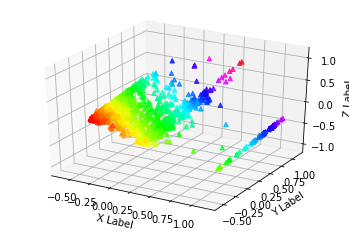

In [ ]:
my_cmap = plt.get_cmap('hsv')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(x_pca_centroid['pc1'], x_pca_centroid['pc2'], x_pca_centroid['pc3'], marker='o')
ax.scatter3D(X_pca['pc1'], X_pca['pc2'], X_pca['pc3'], alpha = 0.8,
                    c = (X_pca['pc1']+ X_pca['pc2']+ X_pca['pc3']), marker='^',cmap = my_cmap)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
Centroids

,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama
Cluster,,,,,,,,
1,0.936483,0.911766,0.577865,0.936044,0.926354,0.901660,0.868480,0.895873
2,0.000000,0.021658,0.422583,0.003448,0.792720,0.654182,0.579073,0.720033
3,0.894426,0.837713,0.419945,0.173510,0.748712,0.613496,0.533569,0.614357
4,0.912153,0.883749,0.532959,0.084320,0.948002,0.949070,0.908802,0.939458


In [ ]:
Centroids.columns

Index(['PK', 'PERFORMANCE', 'COMPETENCY', 'LEARNING POINT', 'Kerja Ibadah',
       'Apresiasi', 'Lebih cepat', 'Aktif bersama'],
      dtype='object')

In [ ]:
Centroids = data_numeric.groupby(["Cluster"]).mean()[["PK","PERFORMANCE","COMPETENCY","LEARNING POINT",'Kerja Ibadah','Apresiasi','Lebih cepat','Aktif bersama']]

In [ ]:
Centroids

,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama
Cluster,,,,,,,,
1,0.936483,0.911766,0.577865,0.936044,0.926354,0.901660,0.868480,0.895873
2,0.000000,0.021658,0.422583,0.003448,0.792720,0.654182,0.579073,0.720033
3,0.894426,0.837713,0.419945,0.173510,0.748712,0.613496,0.533569,0.614357
4,0.912153,0.883749,0.532959,0.084320,0.948002,0.949070,0.908802,0.939458


In [ ]:

# Create a new column with index values
Centroids['Cluster'] = Centroids.index
Centroids


,PK,PERFORMANCE,COMPETENCY,LEARNING POINT,Kerja Ibadah,Apresiasi,Lebih cepat,Aktif bersama,Cluster
Cluster,,,,,,,,,
1,0.936483,0.911766,0.577865,0.936044,0.926354,0.901660,0.868480,0.895873,1
2,0.000000,0.021658,0.422583,0.003448,0.792720,0.654182,0.579073,0.720033,2
3,0.894426,0.837713,0.419945,0.173510,0.748712,0.613496,0.533569,0.614357,3
4,0.912153,0.883749,0.532959,0.084320,0.948002,0.949070,0.908802,0.939458,4
